# Does polar coordinates can improves segmentation?

This notebook explores it the transformation to polar coordinates can help with the segmentation.<br>
<br>
Conclusion: This method has some benefits as it can concentrate all the weld pixels to the left and the background to the right. However, the spatial manipulation that is required and the fact that the border line is not very clear, requires further tools and the reconstruction of the edges back to the original dimensions will be prone to more errors than other investigated methods (such as line profile).

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.exposure import histogram
from skimage import filters as flt
import os
import sys

# Add /scr/data folder to your system path
sys.path.append(os.pardir + '/src/data')

import eda_helper as eh

import importlib
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

#### SETTING UP CONSTANT GLOBAL VERIABLES #########

HOME =  os. path.expanduser('~')+'/Spring23_EPRI_Blue/'
IMG_DIR = 'data/interim/merged_data/not_measured/'

###################################################

img_list_not_measured = os.listdir(HOME+IMG_DIR)


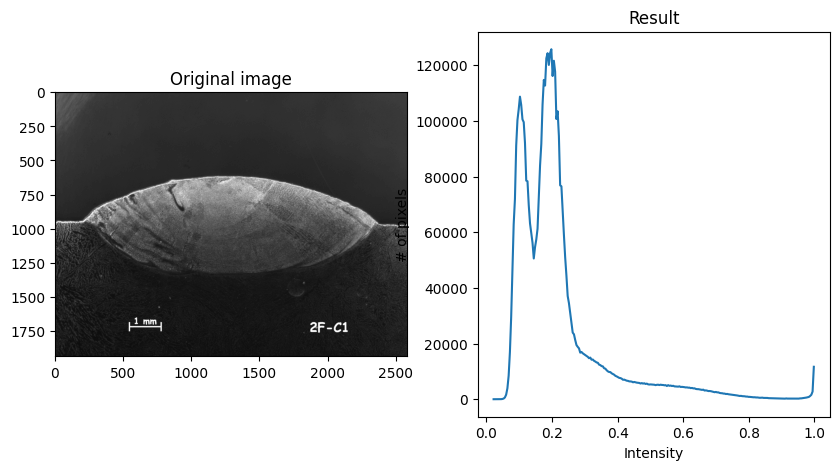

In [7]:
fname = img_list_not_measured[54]
img = io.imread(HOME+IMG_DIR+fname)
gray = rgb2gray(img)
eh.sideBside(gray, gray, type='hist')

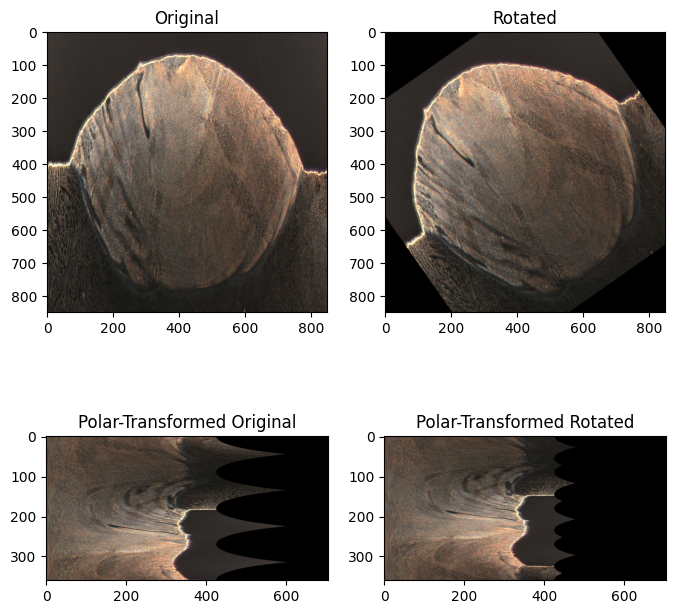

Expected value for counterclockwise rotation in degrees: 35
Recovered value for counterclockwise rotation: 35.0


In [14]:
from skimage.registration import phase_cross_correlation
from skimage.transform import warp_polar, rotate, rescale, resize
from skimage.util import img_as_float

radius = 705
angle = 35
image = resize(img[550:1400], (850, 850), anti_aliasing=True)
image = img_as_float(image)
rotated = rotate(image, angle)
image_polar = warp_polar(image, radius=radius, channel_axis=-1)
rotated_polar = warp_polar(rotated, radius=radius, channel_axis=-1)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original")
ax[0].imshow(image)
ax[1].set_title("Rotated")
ax[1].imshow(rotated)
ax[2].set_title("Polar-Transformed Original")
ax[2].imshow(image_polar)
ax[3].set_title("Polar-Transformed Rotated")
ax[3].imshow(rotated_polar)
plt.show()

shifts, error, phasediff = phase_cross_correlation(image_polar,
                                                   rotated_polar,
                                                   normalization=None)
print(f'Expected value for counterclockwise rotation in degrees: '
      f'{angle}')
print(f'Recovered value for counterclockwise rotation: '
      f'{shifts[0]}')

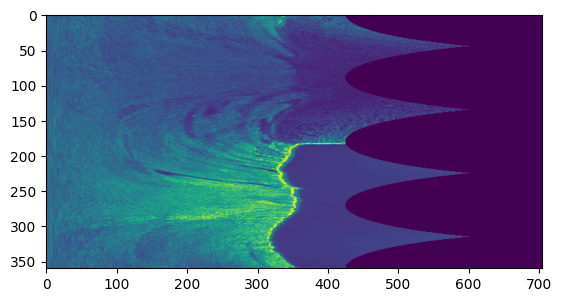

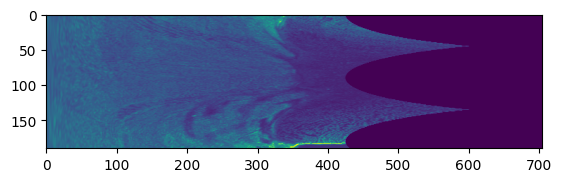

In [31]:
gray = rgb2gray(image_polar)
plt.imshow(gray)
plt.show()
plt.imshow(gray[:190]))

/home/dan_s/.local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.


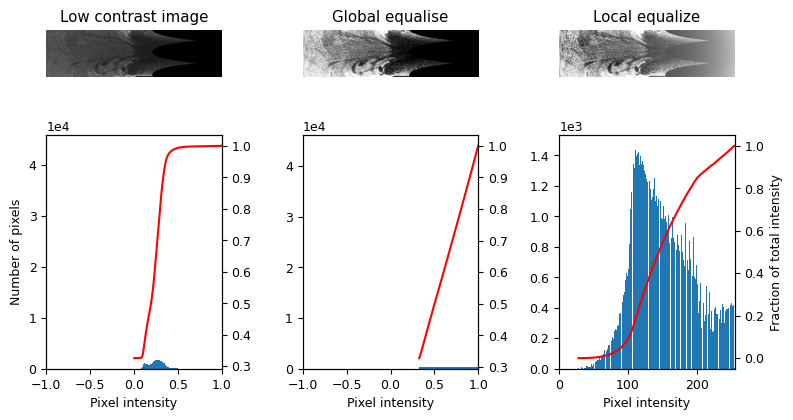

In [64]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank


matplotlib.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = gray[:190]

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
footprint = disk(300)
img_eq = rank.equalize(img, footprint=footprint)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()

In [46]:
from skimage.filters import threshold_otsu


thresh = threshold_otsu(rgb2gray(image_polar[:190,300:400]))
binary = rgb2gray(image_polar[:190,300:400]) > thresh

In [65]:
gray = rgb2gray(image_polar)


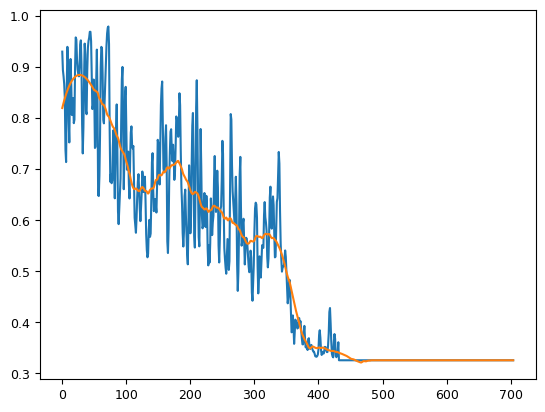

In [67]:
from scipy.signal import savgol_filter
plt.plot(img_rescale[100])
smooth = savgol_filter(img_rescale[100], 101, 3)
plt.plot(smooth, label='smooth')

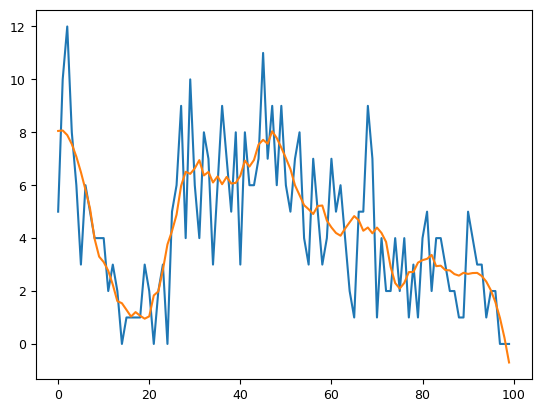

In [85]:
hist, hist_center = np.histogram(img_rescale[100], bins=100, range=(img_rescale[100].min()+.001, 1))
plt.plot(hist)
smooth = savgol_filter(hist, 15, 3)
plt.plot(smooth, label='smooth')
#plt.hist(img_rescale[100], 50, range=(img_rescale[100].min()+.001, 1))
plt.show()

In [86]:
np.where(smooth == smooth.min())

(array([99]),)

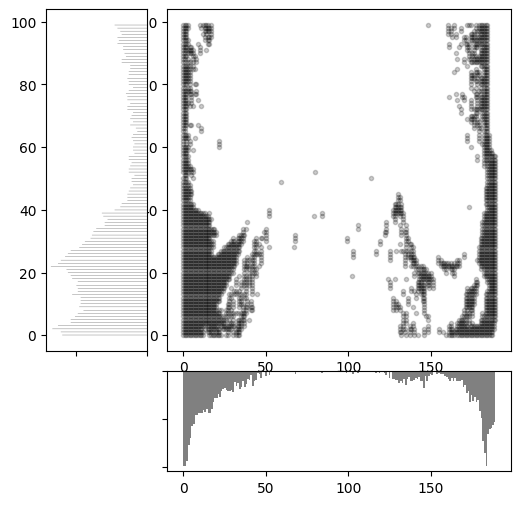

In [52]:

x, y = np.where(binary)

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, binary.shape[0], histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, image_polar.shape[1], histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [55]:
y.shape

(2787,)